In [1]:
!git clone https://github.com/misbah4064/pedestrianDetection.git
%cd pedestrianDetection

Cloning into 'pedestrianDetection'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 5.88 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/pedestrianDetection


In [2]:
import cv2
from google.colab.patches import cv2_imshow

pedestrian_cascade = cv2.CascadeClassifier("haarcascade_fullbody.xml")

# Function to perform pedestrian detection from images. Pass an image as a variable.
def pedestrianDetection(frame):

    pedestrians = pedestrian_cascade.detectMultiScale( frame, 1.1, 1)
    # To draw a rectangle on each pedestrians
    for (x,y,w,h) in pedestrians:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, 'Person', (x + 6, y - 6), font, 0.5, (0, 255, 0), 1)
        # Display frames in a window
    return frame

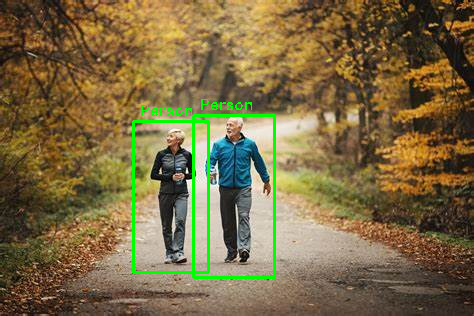

In [4]:
input = cv2.imread("person.jpeg")
output = pedestrianDetection(input)
cv2_imshow(output)

In [7]:
import cv2
cap = cv2.VideoCapture('PedestrianN.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = pedestrianDetection(frame)
  out.write(output)
out.release()
print("Done processing video")

Processing Video...
Done processing video
